In [1]:
import numpy as np
import matplotlib.pyplot as plt

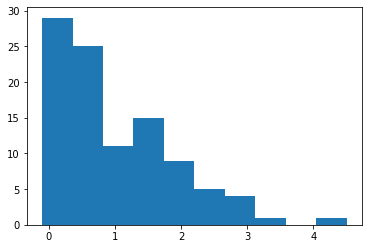

In [2]:
# Basic model
nsteps = 10000
npeople = 100
coin = 0.1

wealth = np.ones(npeople)                           # Init at equal wealth

for t in range(nsteps):
    p1 = np.random.randint(low=0, high=npeople)     # Pick 2 random people
    p2 = np.random.randint(low=0, high=npeople)     # p1 may end up being equal to p2, but it's not gonna break the script.
    if wealth[p1]>0:
        wealth[p1] -= coin                          # Decrease this one
        wealth[p2] += coin                          # But increase this one
        
plt.hist(wealth);

In [3]:
# Define a function to calculate Gini coefficient
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Testing the function:    
print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


Below, we'll need to consider the values of tax_rate we tried. As we'll need them for the x-axis. How to do that? 

3 options!

1. Pre-create an array of all possible values and iterate through them. 
2. Pre-allocate some space, fill it with zeros or something, and write calues there as you go. 
3. Create an empty array 'np.array([])', then append values to it using a = np.ammend(a, new_value). 

In [29]:
#figuring out empty arrays
a = np.array([]) #empty
a = np.append(a, 0.01)
a = np.append(a,0.1)
a

array([0.01, 0.1 ])

In [34]:
# Remember everything, plot the history.

nsteps = 2000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.000
rate = 0.001 #this is the tax rate

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)
taxrates = np.arange(low=0, high=0.16, step=0.01)
final_gini = np.zeros(shape=taxrates.shape)  #shape should be same as the taxrates shape

    
for irate in (len(taxrates)):
    rate = taxrates[itax]
    for t in range(1,nsteps):                             # We now start at t=1, to be able to refer to t-1 (prev step) #x value is current value of tax rate, so taxrate_history
        wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1
        collect = rate*np.sum(wealth[t,:])
        wealth[t,:] = (1 - rate)*wealth[t,:]
        wealth[t,:] += collect/npeople

        for i in range(trades_per_step):                  # Let's make more than 2 ppl trade at each time point.
            p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
            p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
            if wealth[t,p1]>0:
                wealth[t,p1] -= coin        # Still update in place
                wealth[t,p2] += coin
            gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth
    final_gini(i) = gini_history[-1]  #this is how you see the last position in the gini index
    i += 1
        

# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
plt.axhline(1,color='gray')
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
# plt.hlines(1, 0, nsteps) nah this ugly
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');
plt.grid(linestyle = ':');

#------Second figure

plt.figure()
plt.plot(taxrates, final_gini, 'k.')
plt.xlabel('Tax Rate')
plt.ylabel('Final Gini index')

#plt.subplot(1,3,3) #Need to figure out how to plot final Gini coefficient to see how the taxation rate impacts it


SyntaxError: can't assign to function call (<ipython-input-34-98c4529ffecf>, line 31)

In [ ]:
#Add taxation and see how the final gini coefficient changes as you change taxation rate

#For purpose of next exercise, you will only care about final point. Add taxes (subtract from each person a
#portion of their wealth, and then redistribute )
#Gini index will be close to 0 if your tax is extreme, and 1 if your tax is 0

#one row to add taxes
#one row to add giant outer loop that will go through each thing
#one row in beginning to add place to store this 
#one row at end to plot it